<h2>INTEGRAL Observations of Classical Novae</h2>

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

<h3>Reading in our catalogue file:</h3>

In [3]:
data_frame = pd.read_csv('INTEGRAL_novae_wTimes.csv')

In [4]:
data_frame

,Unnamed: 0,Unnamed: 0.1,ID,Name,Other Name,Ra (deg),Dec (deg),l (deg),b (deg),Outburst Year,...,E(B-V) (mag),E(B-V) Err. (mag),_r (arcsec),mode dist (pc),median dist (pc),infimum (pc),supremum (pc),Name.1,MJD,IJD
0,0,0,225,V3890 Sgr,N Sgr 1962,277.680000,-24.01900,9.204000,-6.44300,"1962, 1990",...,0.900 ± 0.300,NaN,0.092,4218.0,4880.5,3024.1,8722.3,V3890 Sgr,NaN,NaN
1,1,1,54,V394 CrA,N CrA 1949,270.108000,-39.01000,352.822000,-7.72300,"1949, 1987",...,: 0.200,NaN,0.908,3225.0,4131.6,1973.9,8709.5,V394 CrA,NaN,NaN
2,2,2,172,V745 Sco,NaN,268.842000,-33.25000,357.358000,-3.99900,"1937, 1989",...,1.000 ± 0.200,NaN,0.107,NaN,NaN,NaN,NaN,V745 Sco,NaN,NaN
3,3,3,101,IM Nor,N Nor 1920,234.861000,-52.32200,327.098000,2.48500,"1920, 2002",...,0.800 ± 0.200,NaN,0.113,1311.7,2290.2,907.6,6533.6,IM Nor,NaN,NaN
4,4,4,3,CI Aql,NaN,283.015000,-1.47700,31.688000,-0.81200,"1917, 1941, 2000",...,0.920 ± 0.220,NaN,0.166,3061.8,3227.9,2532.3,4470.4,CI Aql,NaN,NaN
5,5,5,113,V2487 Oph,N Oph 1998,262.999000,-19.23200,6.604000,7.77500,"1900, 1998",...,0.400 ± 0.080,NaN,0.124,5035.1,5780.1,3494.4,10176.8,V2487 Oph,NaN,NaN
6,6,6,105,RS Oph,N Oph 1898,267.555000,-6.70800,19.800000,10.37200,"1898, 1907, 1933, 1945, 1958, 1967, 1985, 2006",...,0.730 ± 0.100,NaN,0.625,2263.0,2332.1,1935.4,2936.7,RS Oph,NaN,NaN
7,7,7,147,T Pyx,N Pyx 1890,136.173000,-32.38000,257.207000,9.70700,"1890, 1902, 1920, 1944, 1967",...,0.250 ± 0.020,NaN,0.038,3277.6,3413.8,2753.7,4500.7,T Pyx,NaN,NaN
8,8,8,56,T CrB,N CrB 1866,239.875000,25.92000,42.374000,48.16500,"1866, 1946",...,0.100 ± 0.080,NaN,0.199,824.6,827.3,775.7,96640.2,T CrB,NaN,NaN
9,9,9,150,U Sco,N Sco 1863,245.628000,-17.87800,357.669000,21.86900,"1863, 1906, 1917, 1936, 1945, 1969, 1979, 1987...",...,0.140 ± 0.120,NaN,0.313,NaN,NaN,NaN,NaN,U Sco,NaN,NaN


In [5]:
dist = data_frame['Dist. \n(kpc)'] # creating an array with nova distances

(0, 30)

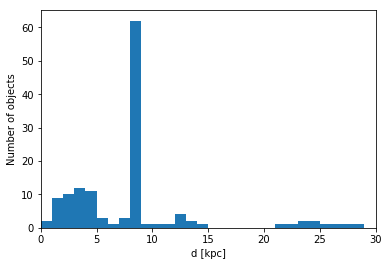

In [6]:
plt.hist(dist,bins=np.arange(0,51,1))
plt.xlabel('d [kpc]')
plt.ylabel('Number of objects')
plt.xlim(0,30)

In [7]:
dist_err = data_frame['Dist. Err. (kpc)']

<h3>Defining indices which novae are chosen</h3>

In [8]:
data_frame['Var. type']

0           NR
1           NR
2           NR
3           NR
4           NR
5           NR
6           NR
7           NR
8           NR
9           NR
10         NAa
11         NAa
12         NAa
13         NAa
14          UG
15         NAa
16         NAa
17         NAa
18         NAa
19         NAa
20           N
21         NAa
22         NAa
23         NAa
24         NAa
25           N
26           N
27          NB
28           N
29           N
        ...   
124          N
125          N
126         NL
127          N
128        NAa
129          N
130          N
131        NAa
132          N
133          N
134          N
135        NAa
136         NC
137          N
138          N
139          N
140          N
141          N
142        NAa
143         NC
144          N
145      NB/DQ
146          N
147          N
148    V838MON
149         NB
150          N
151        NAa
152        NAa
153         NR
Name: Var. type, Length: 154, dtype: object

In [9]:
good_novae = np.where(~np.isnan(data_frame['IJD']) & # no recurrent ones
                      (data_frame['Dist. \n(kpc)']+data_frame['Dist. Err. (kpc)'] < 25) & # inside Milky Way
                        ((data_frame['Var. type'] == 'N') | # different classical nova types
                         (data_frame['Var. type'] == 'NAa') | 
                         (data_frame['Var. type'] == 'NB') |
                         (data_frame['Var. type'] == 'NC') |
                         (data_frame['Var. type'] == 'NTS')))[0]

In [10]:
good_novae # all indices

array([ 10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  56,  57,  59,  60,  61,  62,  63,  64,  65,  69,  71,
        72,  73,  75,  76,  77,  80,  81,  82,  83,  84,  85,  88,  93,
        94,  97,  98,  99, 100, 101, 102, 103, 104, 105, 109, 110, 111,
       112, 114, 116, 117, 119, 120, 121, 124, 125, 127, 129, 131, 134,
       135, 137, 138, 139, 141, 142, 144, 146, 147, 149, 152])

In [11]:
len(good_novae) # number of novae

102

<h3>Expectations:</h3>

In [12]:
print(1*u.pc.to(u.AU)) # conversion of 1 pc to astronomical units
print(1*u.pc.to(u.cm)) # conversion of 1 pc to cm

206264.80624548031
3.0856775814671913e+18


In [13]:
Mej22 = 3e-9*u.Msun # ejected mass of 22Na
Mej07 = 1e-9*u.Msun # ejected mass of 7Be
p22 = 0.9994        # probability of gamma-ray emission at 1.275 MeV
p07 = 0.1052        # probability of gamma-ray emission at 0.478 MeV
m22 = 21.994437*u.u # atomic mass of 22Na
tau22 = 3.753*u.yr  # characteristic lifetime of 22Na (halflife / ln2)
m07 = 7.016929*u.u  # atomic mass of 7Be
tau07 = 76.66*u.d   # characteristic lifetime of 7Be

In [14]:
L022 = Mej22*p22/(m22*tau22) # canonical (intrinsic) luminosity of 22Na gamma-rays
L007 = Mej07*p07/(m07*tau07) # ... of 7Be gamma-rays

In [16]:
L022.to(u.s**(-1)) # this is in units of number (photons) per seconds

<Quantity 1.37827651e+39 1 / s>

<h3>Definition of exponential decay functions, either including mass, distance, times, probabilities for decay etc (top), or only normalisation (bottom)</h3>

In [19]:
def exp_decay_flux_hard(t,T0,M,d,m,tau,p):
    """ returns flux as a function of time from a radioactive source (m,tau,p) of mass M at distance d
     T0 in d        occurrence time 
     M in 1e-9 Msun ejecta mass
     m in u         nuclei mass
     tau in d       decay time (T05/ln(2))
     t in d         time variable
     d in kpc       distance to object
     normalisation (u.Msun/(u.u*u.d*u.kpc**2)).to(1/u.s/u.cm**2) = 1455647780.4139435
    """
    N = 1.4556477804139435
    return N*M*p/(m*tau*4*np.pi*d**2)*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

In [20]:
def exp_decay_hard(t,T0,tau):
    """ returns exponential decay law normalised to one for given decay time
     T0 in d        occurrence time 
     tau in d       decay time (T05/ln(2))
     t in d         time variable
    """
    N = 1.0
    return N*np.exp(-(t-T0)/tau)*np.heaviside(t-T0,1)

<h3>Example of nearby and 'old' (in terms of INTEGRAL observations) nova: index 100</h3>

In [21]:
idx = 100
print('Object name:                             ',data_frame['Name'][good_novae[idx]])
print('Outburst date:                           ',data_frame['Date (YYYY/MM/DD.DDDD)'][good_novae[idx]])
#print('Outburst date in INTEGRAL Julian Days (IJD)')
print('Outburst IJD:                            ',data_frame['IJD'][good_novae[idx]])
print('Outburst MJD:                            ',data_frame['MJD'][good_novae[idx]])
print('Object coordinates (l/b):                ',data_frame['l\n(deg)'][good_novae[idx]],data_frame['b\n(deg)'][good_novae[idx]])
print('Object distance (and uncertainty) [kpc]: ',data_frame['Dist. \n(kpc)'][good_novae[idx]],data_frame['Dist. Err. (kpc)'][good_novae[idx]])

Object name:                              V2540 Oph
Outburst date:                            2002 01 24.8
Outburst IJD:                             754.8000000000029
Outburst MJD:                             52298.8
Object coordinates (l/b):                 9.75 8.152000000000001
Object distance (and uncertainty) [kpc]:  9.88 4.771


In [22]:
lon = data_frame['l\n(deg)'][good_novae]
lat = data_frame['b\n(deg)'][good_novae]

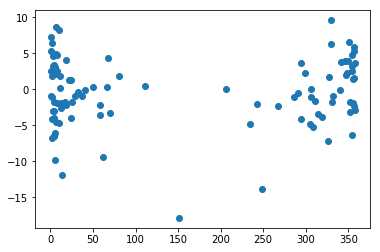

In [23]:
plt.plot(lon,lat,'o')

In [24]:
lon[lon > 180] -= 360

In [25]:
lon_rad = np.deg2rad(lon.values)
lat_rad = np.deg2rad(lat.values)

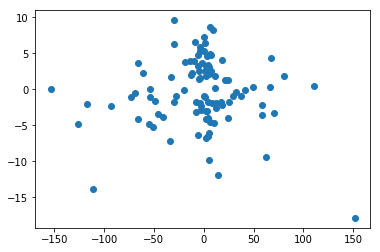

In [26]:
plt.plot(lon,lat,'o')

In [27]:
lon2 = lon.values
lat2 = lat.values

In [28]:
lon2_rad = np.deg2rad(lon2)
lat2_rad = np.deg2rad(lat2)

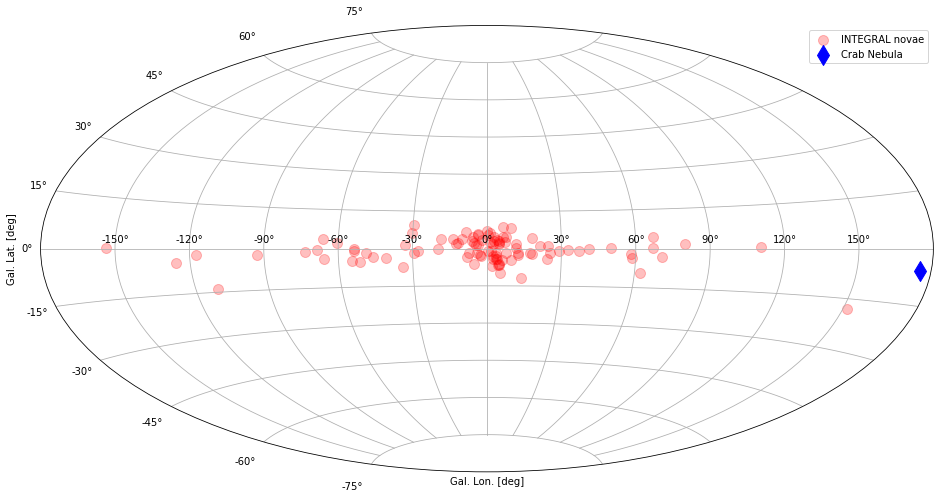

In [35]:
plt.figure(figsize=(16,10))
plt.subplot(111,projection='aitoff')
plt.scatter(lon2_rad,lat2_rad,marker='o',s=100,alpha=0.25,c='red',label='INTEGRAL novae')
plt.grid(True)
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')

# SIMBAD coordinates of the Crab: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Crab+Nebula
crab_lon = 184.55745
crab_lat = -05.78436

crab_lon_rad = np.deg2rad(360-crab_lon)
crab_lat_rad = np.deg2rad(crab_lat)

plt.scatter(crab_lon_rad,crab_lat_rad,marker='d',s=200,c='blue',label='Crab Nebula')

plt.legend()

<h3>Gamma-ray light curve (=model) of a perfect instrument with omni-directional response</h3>

In [88]:
tt = np.arange(0,7000,1) # array of times in units of IJD

name0 = data_frame['Name'][good_novae[idx]]
d0 = dist[good_novae[idx]]*u.kpc # distance to nova (in units of kpc)
T00 = data_frame['IJD'][good_novae[idx]] # explosion date
tau_d = tau22.to(u.d).value # conversion of the lifetime in days

F_norm = L022 / (4*np.pi*d0**2) # calculation of maximum flux (i.e. at t = T0)
# note that L022 is SET to a certain value which we decided in the first place
# our goal will be to find out what L022 (and Mej22) actually is

F_norm = F_norm.to(1/(u.cm**2*u.s)).value # conversion to useful flux units (ph/cm2/s) and only return the value

flux = F_norm*exp_decay_hard(tt,T00,tau_d)

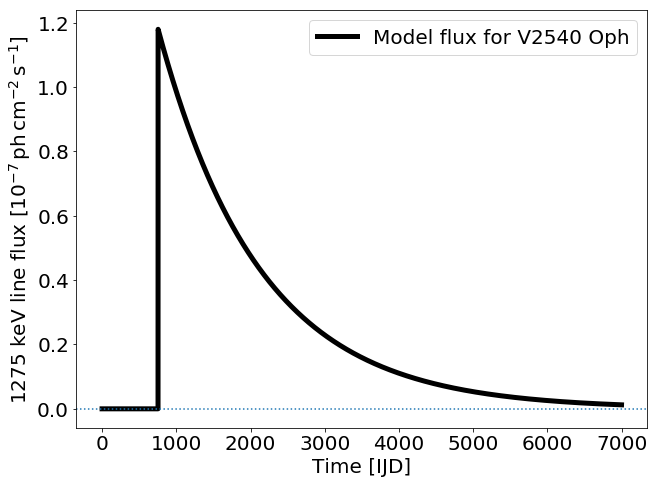

In [89]:
plt.figure(figsize=(10.24,7.68))
plt.plot(tt,flux*1e7,label='Model flux for '+name0,color='black',linewidth=5)
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'1275 keV line flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Now, what can we expect to measure in our instrument?</h3>

In [90]:
T_exp = 86400. # seconds per day (= one time bin)
A_eff = 10. # fake collecting area of ouf perfect instrument (in cm^2)

In [91]:
model_counts = flux * T_exp * A_eff # expected number of counts per time bin

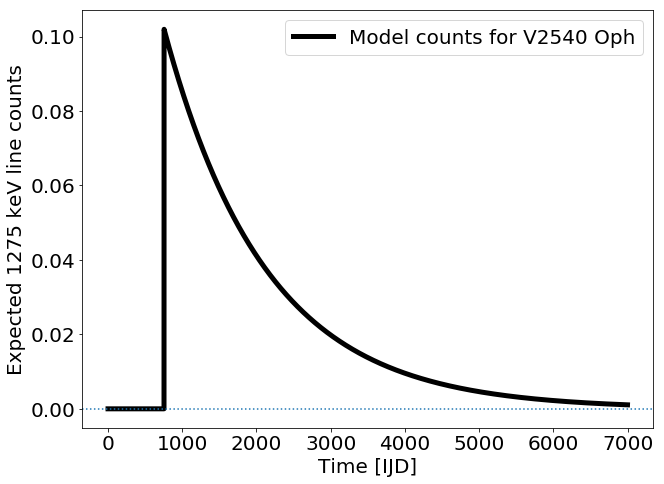

In [92]:
plt.figure(figsize=(10.24,7.68))
plt.plot(tt,model_counts,label='Model counts for '+name0,color='black',linewidth=5)
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'Expected 1275 keV line counts',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Since we cannot measure 0.1 photons, we draw a random sample according to our data generating process, which is the Poisson distrivbution (= counting per interval)<br>
    Note that this is not necessarily photons and not necessarily time</h3>

In [93]:
np.random.seed(1234)
count_data = np.random.poisson(model_counts) # this produces one random sample from our model
# the seed=1234 tells the function to always produce the same random sample

<Figure size 1152x720 with 0 Axes>

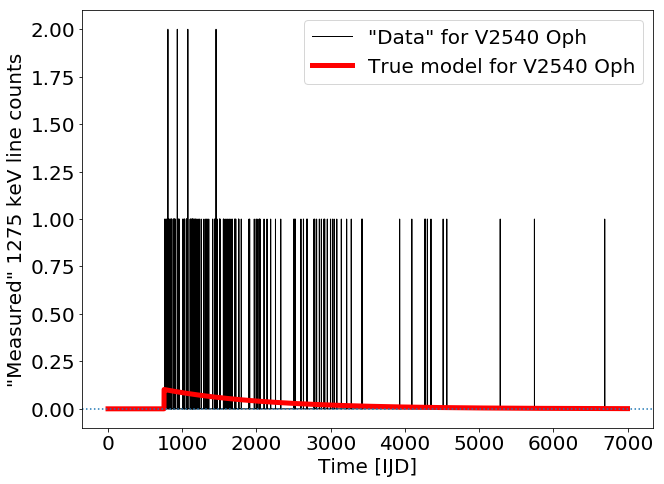

In [94]:
plt.figure(figsize=(16,10))

plt.figure(figsize=(10.24,7.68))
plt.step(tt,count_data,label='"Data" for '+name0,color='black',linewidth=1)
plt.plot(tt,model_counts,label='True model for '+name0,color='red',linewidth=5) # same as above
plt.xlabel('Time [IJD]',fontsize=20)
plt.ylabel(r'"Measured" 1275 keV line counts',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':')
plt.legend(fontsize=20)

<h3>Each spike is either 0, 1, or 2 photons that our fake instrument measured<br>
    This is a "simulation" of data, i.e. one particular realisation of what could have been measured, given our model that we put in</h3>

<h3>Now that we have data and a parametrised model, we can fit this again, and check if we can get back what we put in<br>
    This might sound redundant as we already know the answer, but provides a consolidation of our data generation and the applied inference method (finding a maximum of the Poisson likelihood). It is the start of a principled data analysis and is required to work, as otherwise, we can never be sure what we would infer from 'real' measurements</h3>

In [118]:
# Definition of the logarithm of the Poisson likelihood for our model in which we are interested in only the flux
def lnlike(theta, t, data, T0, tau): # the unknown (to-be-fitted) parameters have to be the first argument
    # this is because of the way the following programs are reading this likelihood function
    
    f = theta # parametes to be fitted
    
    model = f * exp_decay_hard(t,T0,tau) * T_exp * A_eff # our model in count space(!), i.e. expected number
    
    if np.any(model < 0): # if the model is negative, the likelihood can increase infinitely
        return -np.inf
    else:
        # calculate Poisson likelihood
        stat = -2*np.sum(model - data*np.nan_to_num(np.log(model))) # nan_to_num to avoid problems with log(0)
        return stat

In [132]:
f_arr = np.arange(1e-9,2e-7,1e-9)

In [149]:
len_f = len(f_arr)
loglik_arr = np.zeros(len_f)
for i in range(len_f):
    loglik_arr[i] = lnlike(f_arr[i],tt,count_data,T0,tau_d)

Delta_loglik = -loglik_arr-np.min(-loglik_arr)

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


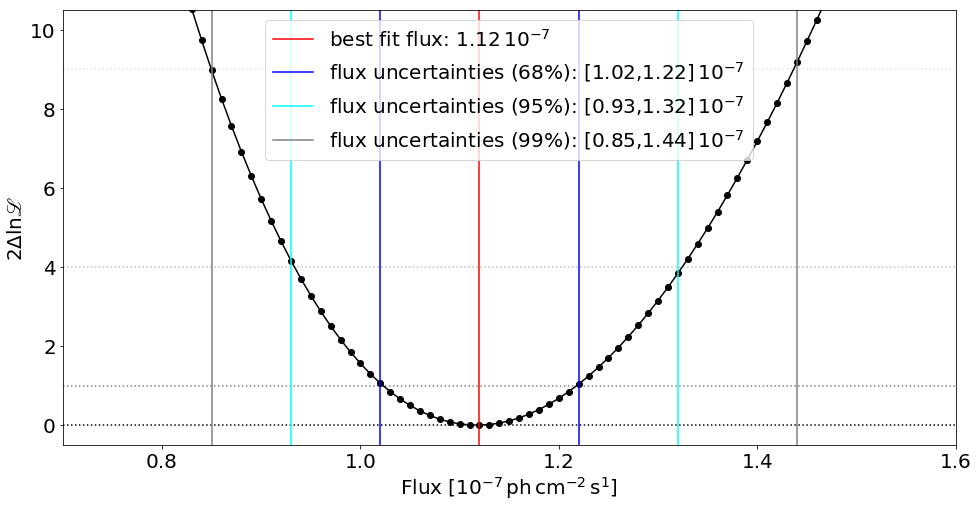

In [212]:
plt.figure(figsize=(16,8))
plt.plot(f_arr*1e7,Delta_loglik,'ko-')
plt.xlim(0.7,1.6)
plt.ylim(-0.5,10.5)
plt.xlabel(r'Flux [$10^{-7}\,\mathrm{ph\,cm^{-2}\,s^{1}}$]',fontsize=20)
plt.ylabel(r'$2\Delta\mathrm{\ln\mathscr{L}}$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(0,linestyle=':',color='black')
plt.axhline(1,linestyle=':',color='black',alpha=0.5)
plt.axhline(4,linestyle=':',color='black',alpha=0.25)
plt.axhline(9,linestyle=':',color='black',alpha=0.1)

f_bestfit = f_arr[np.where(Delta_loglik ==0)[0]] # minimum defines best fit
f_1sigma_plusmin = f_arr[np.where((Delta_loglik > 0.9) & (Delta_loglik < 1.1))[0]]
# 2Delta_lnlike = 1 defines the 68.3% uncertainties
f_2sigma_plusmin = f_arr[np.where((Delta_loglik > 3.8) & (Delta_loglik < 4.2))[0]]
# 2Delta_lnlike = 4 defines the 95.4% uncertainties
f_3sigma_plusmin = f_arr[np.where((Delta_loglik > 8.8) & (Delta_loglik < 9.2))[0]]
# 2Delta_lnlike = 9 defines the 99.7% uncertainties

plt.axvline(f_bestfit*1e7,color='red',
            label=r'best fit flux: '+str('%3.2f' % (f_bestfit*1e7))+'$\,10^{-7}$')

plt.axvline(f_1sigma_plusmin[0]*1e7,color='blue',
            label=r'flux uncertainties (68%): '+str('[%3.2f,%3.2f]' % (f_1sigma_plusmin[0]*1e7,f_1sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_1sigma_plusmin[1]*1e7,color='blue')

plt.axvline(f_2sigma_plusmin[0]*1e7,color='cyan',
            label=r'flux uncertainties (95%): '+str('[%3.2f,%3.2f]' % (f_2sigma_plusmin[0]*1e7,f_2sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_2sigma_plusmin[1]*1e7,color='cyan')

plt.axvline(f_3sigma_plusmin[0]*1e7,color='gray',
            label=r'flux uncertainties (99%): '+str('[%3.2f,%3.2f]' % (f_3sigma_plusmin[0]*1e7,f_3sigma_plusmin[1]*1e7))+'$\,10^{-7}$')
plt.axvline(f_3sigma_plusmin[1]*1e7,color='gray')


plt.legend(fontsize=20)

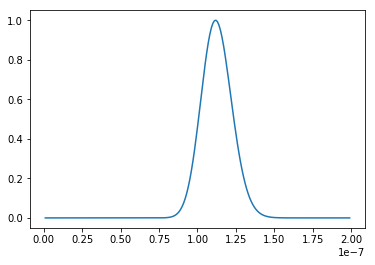

In [274]:
plt.plot(f_arr,np.exp(-0.5*Delta_loglik))

In [336]:
# Template for 1D model fitting with emcee
# Example: fitting a straight line in x and y with Gaussian priors
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pickle
plt.style.use('thomas')
import scipy.optimize as op
import corner


In [223]:
import emcee
from tqdm import tqdm_notebook as tqdm
import corner

In [264]:
choose = np.arange(0,7000,100)

ndim, nwalkers = 1, 10
pos = [1e-8*np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(tt[choose], count_data[choose], T00, tau_d))

sampler.reset()

pos, prob, state  = sampler.run_mcmc(pos, 2000, progress=True)



/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
100%|██████████| 2000/2000 [00:01<00:00, 1055.40it/s]


In [265]:
samples = sampler.get_chain()
samplesf = sampler.flatchain
samples.shape

(2000, 10, 1)

In [266]:
samplesf.shape

(20000, 1)

In [267]:
ndim

1

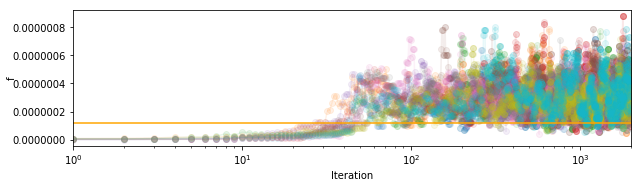

In [268]:
fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)
samples = sampler.get_chain()
labels = ["f"]
truths = [F_norm]
for i in range(ndim):
    if ndim == 1:
        ax = axes
        ax.set_xlabel("Iteration");
    else:
        ax = axes[i]
        axes[-1].set_xlabel("Iteration");
    ax.plot(np.arange(len(samples)),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, len(samples))
    ax.plot([1,len(samples)],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')



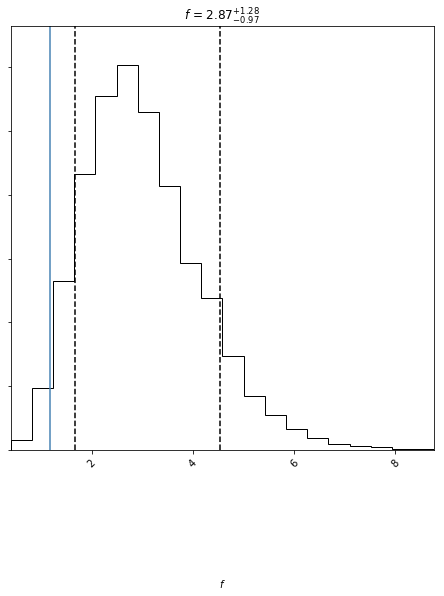

In [269]:
#let's plot the results
fig = corner.corner(samplesf[1000*ndim:]*1e7, labels=["$f$"],
                      truths=[F_norm*1e7],quantiles=[0.1,0.9],show_titles=True)
fig.set_size_inches(10,10)

In [270]:
F_norm

1.180080164266053e-07

In [271]:
np.median(samplesf[1000*ndim:]),np.std(samplesf[1000*ndim:])

(2.8655410016293153e-07, 1.1453201224735613e-07)

In [272]:
t_model = np.arange(0,7000,10)

y_models = np.zeros((len(t_model),samplesf.shape[0]))
for i in range(samplesf.shape[0]):
    y_models[:,i] = samplesf[i,:]*exp_decay_hard(t_model,T00,tau_d) * T_exp * A_eff

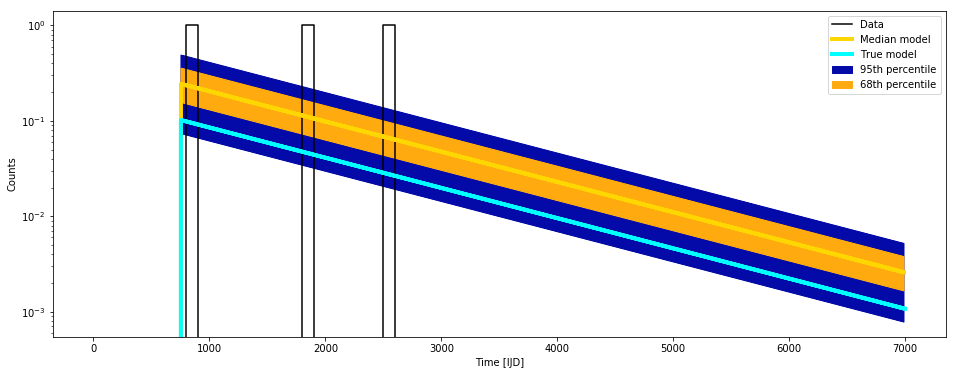

In [273]:
plt.figure(figsize=(16,6))

plt.step(tt[choose],count_data[choose],color='black',label='Data')

level = 95.4
plt.fill_between(t_model,
                np.percentile(y_models, 50 - 0.5*level, axis=1 ),
                np.percentile(y_models, 50 + 0.5*level, axis=1 ),
                color='xkcd:cobalt blue',alpha=1.0,step='mid',label='95th percentile')

level = 68.3
plt.fill_between(t_model,
                np.percentile(y_models, 50 - 0.5*level, axis=1 ),
                np.percentile(y_models, 50 + 0.5*level, axis=1 ),
                color='xkcd:yellowish orange',alpha=1,step='mid',label='68th percentile')

fit_model = np.median(y_models,axis=1)
plt.step(t_model,fit_model,linewidth=4,color='gold',where='mid',label='Median model')

plt.xlabel('Time [IJD]')
plt.ylabel('Counts')

#plt.xscale('log')
plt.yscale('log')
plt.step(tt,flux*T_exp*A_eff,color='cyan',linewidth=4,where='mid',label='True model')

plt.title('')
plt.legend()

In [231]:
y_models.shape

(700, 20000)

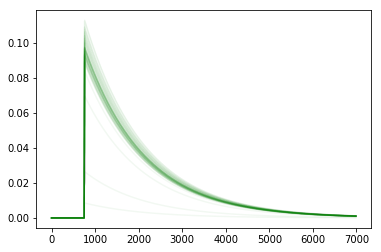

In [232]:
for i in range(50):
    plt.plot(t_model,y_models[:,i*100],alpha=0.05,color='green')
